<a href="https://colab.research.google.com/github/nay-ramos/analiseDados/blob/main/startingProjects/HotelBooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Hotel Bookings**
  <code style="color:#4a304f"><font color= #d689e6>Nível 1</font></code>   <code style="color:#4a304f"><font color= #d689e6>Nível 2</font></code>

 Nesses níveis, a gente apredeu sobre:

*   Conceitos básicos de Análise de Dados
*   Fórmulas básicas de Google Sheets
*   EDA
*   Tabela dinâmica
*   Criação de Dashboard
*   Gráficos e cores

\

---

### 🗃️ **O dataset**

><font size=2>>>> [Hotel Booking Demand - Kaggle.com](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) por Rohit Sahoo </font>


>Este dataser contém informações de reserva para um hotel numa cidade e um hotel resort, e inclui informações como: quando a reserva foi feita, duração da estadia, o número de adultos, crianças e/ou bebês, o número de lugares de estacionamento disponíveis, etc.

\

---

### ❓❓ **Perguntas chave:**


1.   Quais os padrões de reserva de hotel?
2.   Quais as razões para cancelamento de reserva?

 \
---

###  ⚙️ **Processo:**
  1. Coletar dados e analisar
  2. Limpeza e Preparação
  3. Análise Exploratória de Dados (EDA)
  4. Visualização de Dados
  5. Insights!

 \
---

### 🔨 Ferramentas

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src=" https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fstatic.vecteezy.com%2Fsystem%2Fresources%2Fpreviews%2F027%2F179%2F391%2Foriginal%2Fgoogle-sheet-spreadsheet-icon-logo-symbol-free-png.png&f=1&nofb=1&ipt=846afb1d0beb5b56dbe83a06a031b82a9b00c8ae31e844505e22d641094ac66d" width="40">

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Google Sheets


---



## **1. Coletar dados e analisar**

In [ ]:
import pandas as pd
import numpy as np

dfsuperstore = pd.read_csv('/content/drive/MyDrive/telos/SquadAmarelo/Datasets/N2 _ hotel_bookings.csv')
dfsuperstore.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


<font size=3>*Para entender os padrões de reserva de Hotel, as colunas mais importantes são as que envolvem fatores que influenciam diretamente na escolha, exemplo:*</font>

coluna                  | possível fator de influência
-----                   | -----
Tipo de hotel | objetivo da viagem
antecedência de reserva | objetivo da viagem, qtd de hospedes
Data da estadia         | objetivo da viagem, qtd de hospedes, questões climáticas
Duração da estadia      | objetivo da viagem, urgência

\


*Quanto aos motivos de cancelamento, as colunas mais importantes podem envolver os "facilitadores de cancelamento", exemplo:*


facilitadores de cancelamento   |  possíveis motivos
-----                   | -----
qtd de hospedes | a facilidade de cancelar apenas 1 hospede
reserva sed depósito | cancelamento sem impacto financeiro
antecedência de reserva   | questões pode ocorrer se a antecedência for longa

\


## **2. Limpeza e Preparação**

Tendo em vista as colunas importantes para a análise, foram organizadas e corrigidas colunas de data, custos, tratamento de nulos, ausentes e outliers. Também foram inclusas novas colunas que podem colaborar com a análise:


*   Mês de reserva (número e nome)
*   Total de Hospedes
* Tempo entre reserva e cancelamento
* Duração da estadia de fato
* etc.




In [ ]:
import pandas as pd
import numpy as np

dfsuperstore = pd.read_csv('/content/drive/MyDrive/telos/Módulo 2/reserva_hotel_limpo.csv')
dfsuperstore.head(4)

/tmp/ipython-input-6-2650155268.py:4: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  dfsuperstore = pd.read_csv('/content/drive/MyDrive/telos/Módulo 2/reserva_hotel_limpo.csv')


,Hotel,cancelado,tempo entre reserva e estadia,data chegada,data reserva,mês que reservou,ano chegada,mês Chegada,mês chegada (num),semana chegada,...,tarifa média diária,vagas de estacionamento solicitadas,pedidos especiais,status da reserva,data cancelamento/check out,total hospedes,duração estadia de fato,duração estadia reservado,dias para cancelar,antecipação de reserva
0,Resort Hotel,0.0,342.0,01/07/2015,24/07/2014,July,2015.0,July,7.0,27.0,...,"€0,00",0.0,0.0,Check-Out,01/07/2015,2,0.0,0.0,342.0,342.0
1,Resort Hotel,0.0,737.0,01/07/2015,24/06/2013,June,2015.0,July,7.0,27.0,...,"€0,00",0.0,0.0,Check-Out,01/07/2015,2,0.0,0.0,737.0,737.0
2,Resort Hotel,0.0,7.0,01/07/2015,24/06/2015,June,2015.0,July,7.0,27.0,...,"€75,00",0.0,0.0,Check-Out,02/07/2015,1,1.0,1.0,8.0,7.0
3,Resort Hotel,0.0,13.0,01/07/2015,18/06/2015,June,2015.0,July,7.0,27.0,...,"€75,00",0.0,0.0,Check-Out,02/07/2015,1,1.0,1.0,14.0,13.0


## **3. Análise Exploratória de Dados**


1.   Análise de medidas centrais
2.   Geração de tabelas dinâmicas para explorar:
    
    2.1.  Cancelamento x Duração da estadia  \
    2.2.  Seguimento de reserva  \
    2.3.  Medias gerais por ano \
    2.4.  Medidas gerias país de origem do hospede
  
   \
   *entre outras medidas e comparações...*



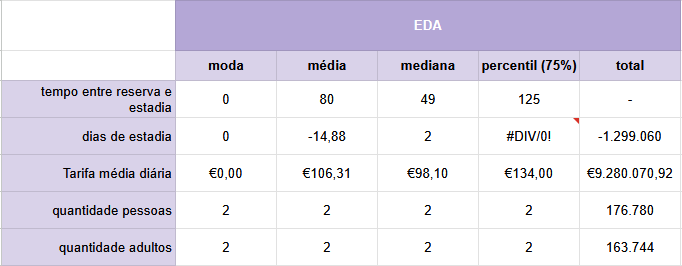

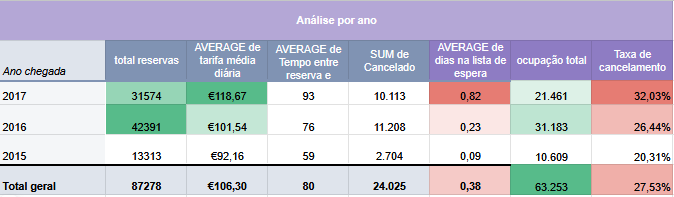

##  **4. Visualização de Dados**


**Acesse aqui:** [Dashboard](https://docs.google.com/spreadsheets/d/1-expoNpEaAXm33Fi2pBnlvCIb5aX4wvePBdfMJlWRLc/edit?usp=sharing)

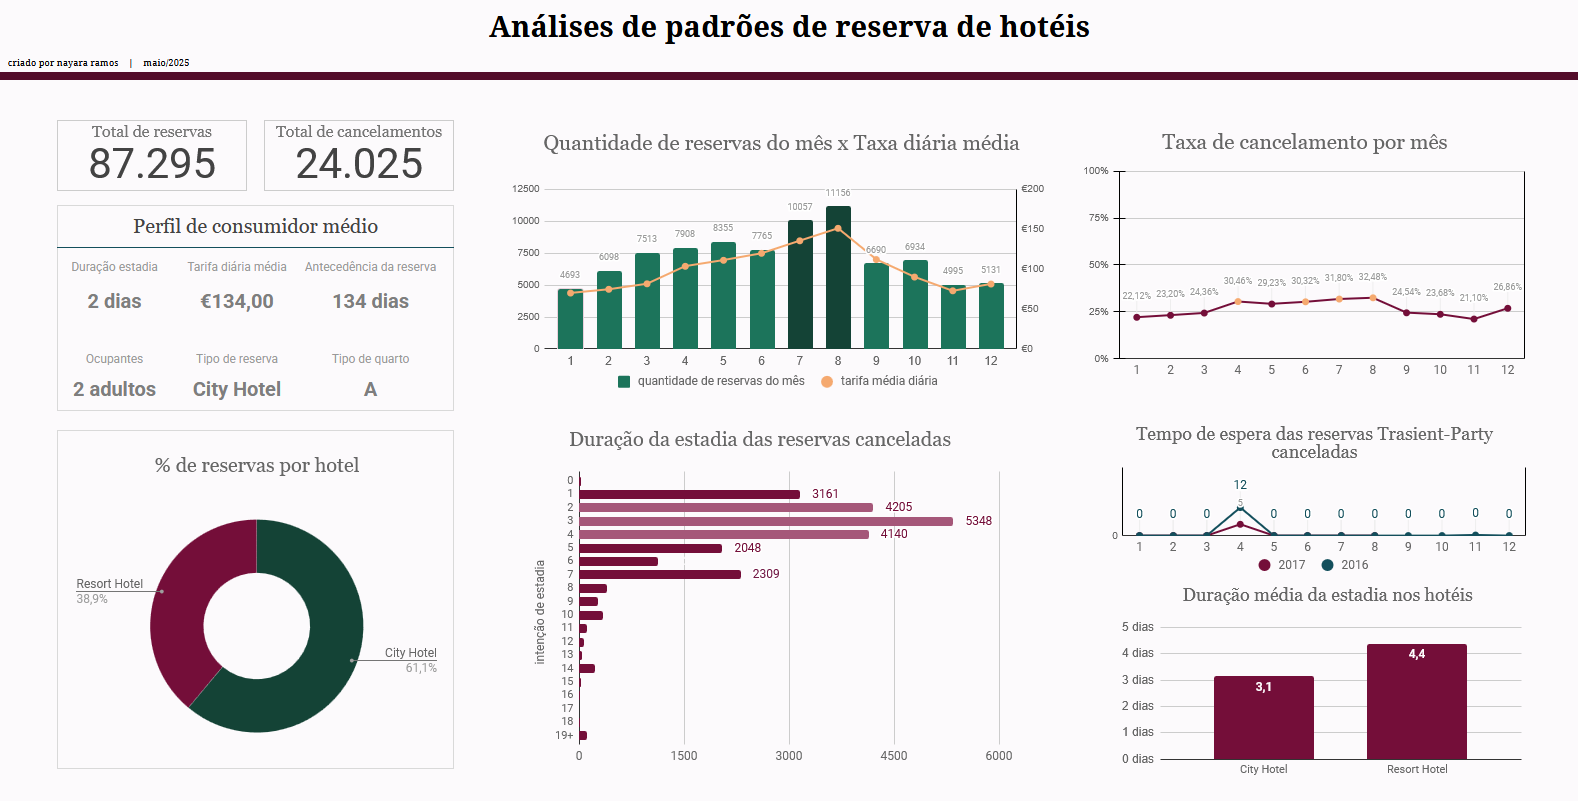


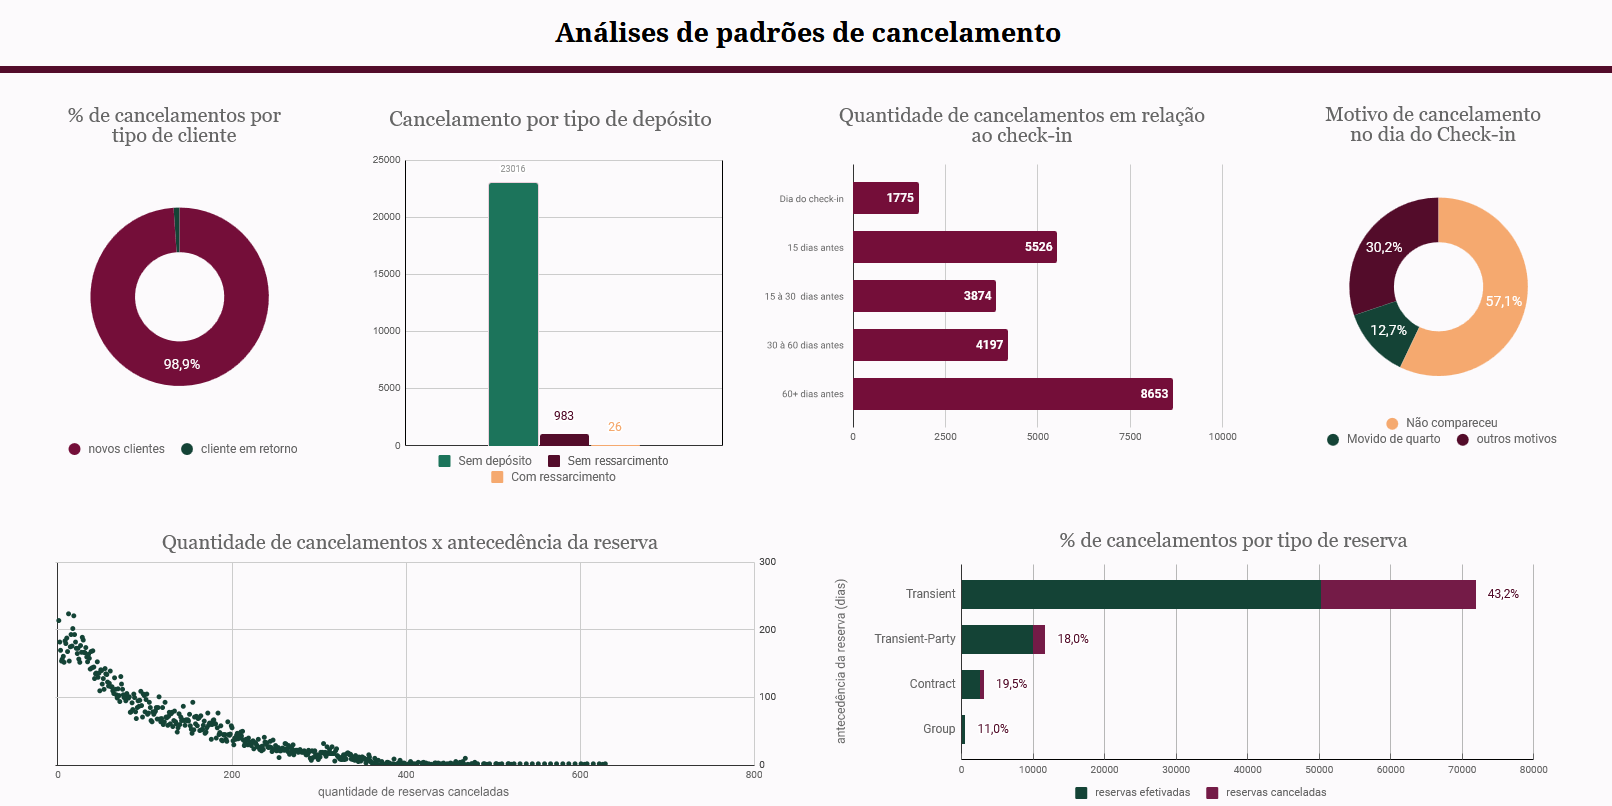

## **5. Insights**

#### ⏰ **Quando à periodicidade**



1.   Os meses de **julho e setembro são mais disputados** pelos clientes
> <font size=2>*O gráfico ```Quantidade de reservas do mês x Taxa diária média``` mostra o maior interesse do público nos hotéis durante o verão europeu (maio à agosto) especificamente nos meses de julho e agosto.*</font>

2.  O cancelamento acompanha proporcionalmente a quantidade de reservas
> <font size=2>*Os meses mais conmcorridos também são os que possuem mais cancelamentos. O ponto fora da curva nessa questão seria o mês de **Abril**, que tem uma quantidade de cancelamentos desproporcional às suas reservas. O gráfico ```Tempo de espera das reservas Transient-Party canceladas``` mostra que o tempo de espera médio para reservas do tipo Transiente Party nesse mês foi maior que "0" que é a média de todos os outros meses.*</font>


```
  💡 É necessário avaliar a % de ocupação real (quartos com reservas não    
     canceladas) para buscar a ocupação 100% dos hotéis nesse período. Em especial, fazer
     pacotes para junho e julho que é o período de férias do ano letivo
  
```

3.  Não existe impacto da duração da estadia no cancelamento das reservas
> <font size=2>*O gráfico ```Duração da estadia das reservas canceladas``` mostra que a maior parte das estadias canceladas duram de 1 à 3 dias.


```
  💡 No mês de abril, tanto em 2016 como 2017, houve um despreparo para lidar
     com reservas Transient-Party tornando o tempo de espera um potencial
     motivo de aumento de cancelamentos. É necessário investigar a causa por
     trás do longo tempo de espera e a relação com os cancelamentos.
  
```
---

#### 🏨 **Quanto ao tipo de Hotel e de depósito**


1.   Os clientes preferem o City Hotel mas passam mais tempo no Resort Hotel
> <font size=2>*Segundo os dados analisados nos gráficos  ```% de reservas por hotel``` e  ```Duração média da estadia nos hotéis ``` o City Hotel tem 60% de reservas do total e, apesar do Resort Hotel ter apenas 40% ele tem uma média de estadia de mais de 4 dias por reserva.*</font>

2.   As reservas sem depósito tem mais cancelamentos
> <font size=2>*Ao ver o gráfico ```Cancelamento por tipo de depósito```, é notável a grande diferença por tipo de reserva. Reservas sem depósito são mais canceladas por não ter o compromisso financeiro com o hotel.*</font>

```
  💡 Nesse sentido, é interessante estimular o vínculo financeiro (depósito
     prévio)com o hotel, o que pode ser feito por promoções, bônus e benefícios
     extra como o serviço de quarto, etc. Essas ações, mesmo se a reserva for
     cancelada, os hoteis terão um retorno financeiro.

```
---

#### 🚫 **Quanto ao cancelamento**

1.   A maior parte dos cancelamentos é por não comparecimento
> <font size=2>*Segundo o gráfico ```Quantidade de cancelamentos em relação ao check-in```, mais de 1700 cancelamentos são feitos no dia do Check in e desses valor, 57% foi por não comparecimento do cliente no check in.
*</font>


```
  💡 O não comparecimento ao check in diminui a taxa de ocupação no hotel por
     deixar quartos vazios em períodos que supõe-se ocupação. Uma ação para
     diminuir tanto essa forma de cancelamento como o cancelamento encima da
     hora é o envio de mensagens de confirmação de estadia proporcional com o
     tempo de antecipação de reserva. Exemplo: Se a estadia foi feita com um
     ano de antecedência, podem ser enviadas mensagens a cada 4 meses
     confirmando a estadia. Se for com 1 mês de antecedência, apenas uma vez.
     Isso vai fazer com que clientes que não tem intenção de manter a reserva
     não impeçam o uso de quartos por novos clientes e garanta uma rotatividade
     as reservas mais ágil.

```

2.   Quanto maior antecedência das reservas, maior as chances de cancelamento
> <font size=2>*Guiando-se no gráfico ```Quantidade de cancelamentos x antecedência da reserva```, é visível a relação proporcional entre o cancelamento da reserva e a antecedência com a qual ela foi feita. Em especial, se o cancelamento for feio próximo a data de check-in, isso significa um bloqueio de quartos para novos clientes.*</font>

3.   As reservas mais canceladas são as do tipo Transient
> <font size=2>*Ao ver o gráfico ```% de cancelamentos por tipo de reserva```, é notável que do total de reservas do tipo transiente de 2015 à 2017 43% foram canceladas.*</font>

```
  💡 As reservas do tipo Transient tem menos "compromisso" do que outros tipos,
     fazendo mais fácil de serem canceladas, em especial porque boa parte delas
     é feita sem depósito prévio e, além disso, não são feitas por grupos e
     empresas, sendo essas mais planejadas e com mais garantia de manterem na
     agenda. A criação de mais vículos nesse tipo de reserva pode diminuir a
     quantidade de cancelamentos. É interessante a criação de uma pesquisa
     perguntando o motivo do cancelamento quando o cliente for consumar o ato
     para uma análise mais completa.
```

4.   Clientes em retorno não cancelam
> <font size=2>*Uma porcentágem mínima de clientes em retorno tendem à cancelar (```% de cancelamentos por tipo de cliente```), isso mostra a satisfação deles com os serviços fornecidos pelos hotéis.*</font>

```
  💡 Um caminho de atuação é na construção do primeiro contato do cliente com o
     hotel. Tanto pode ser expostos comentários de clientes que já ficaram nos
     hotéis como pode ser criado um fluxo de finalização do funil de vendas mais
     agressivo, com foco em fazer com que esse cliente tenha sua "primeira
     estadia" e possa tornar-se um cliente em retorno. É interessante a criação
     de uma base de dados com o "id" do cliente para valiarmos uma taxa de
     chance de retorno que poderia embasar melhor esse argumento.
```